In [5]:
import cudf
import cuspatial as csp
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_parquet("https://pydatatt.s3.amazonaws.com/Combined/LA_cargo_2019.geoparquet")
df = df.drop(['t', 'geometry', 'Region'],axis=1).reset_index()
df

,index,BaseDateTime,MMSI,LAT,LON,SOG,COG,Heading,VesselName,IMO,VesselType,Draft
0,3602,2019-01-01 00:00:00,538003831.0,32.65434,-117.12185,2.5,347.1,349.0,GLOVIS COUNTESS,IMO9476721,70.0,9.7
1,3603,2019-01-01 00:05:00,538003831.0,32.66100,-117.12315,7.7,347.2,346.0,GLOVIS COUNTESS,IMO9476721,70.0,9.7
2,3604,2019-01-01 00:10:00,538003831.0,32.67183,-117.12553,8.6,350.1,350.0,GLOVIS COUNTESS,IMO9476721,70.0,9.7
3,3605,2019-01-01 00:15:00,538003831.0,32.68199,-117.13167,9.7,319.5,317.0,GLOVIS COUNTESS,IMO9476721,70.0,9.7
4,3606,2019-01-01 00:20:00,538003831.0,32.69181,-117.14166,10.9,311.2,309.0,GLOVIS COUNTESS,IMO9476721,70.0,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2306892,38093832,2019-12-31 23:35:00,538003241.0,32.83861,-117.81910,10.6,341.5,341.0,INGRID C,IMO9546112,70.0,12.8
2306893,38093833,2019-12-31 23:40:00,538003241.0,32.85107,-117.82727,10.6,339.7,340.0,INGRID C,IMO9546112,70.0,12.8
2306894,38093834,2019-12-31 23:45:00,538003241.0,32.86525,-117.83115,10.6,339.2,340.0,INGRID C,IMO9546112,70.0,12.8
2306895,38093835,2019-12-31 23:50:00,538003241.0,32.87381,-117.83857,10.4,339.3,339.0,INGRID C,IMO9546112,70.0,12.8


In [3]:
df2 = df[df.BaseDateTime < pd.Timestamp("2019-01-13")].copy()
df2 = df2[df2.VesselName == "CORAL SAPPHIRE"]
df2.loc[::5].hvplot.points('LON', 'LAT', geo=True, c='COG', alpha=0.5, tiles='ESRI', width=900, height=400, cmap="RdYlGn")

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]   (COG)

In [19]:
# from holoviews import opts, dim


# plot_defaults = {'linewidth':5, 'capstyle':'round', 'figsize':(9,3), 'legend':True}
# opts.defaults(opts.Overlay(active_tools=['wheel_zoom']))
# hvplot_defaults = {'tiles':'CartoLight', 'frame_height':320, 'frame_width':320, 'cmap':'Viridis', 'colorbar':True}

In [6]:
%%time
gdf1 = df[df.BaseDateTime < pd.Timestamp("2019-01-14")].copy()
gdf1 = gpd.GeoDataFrame(gdf1, geometry=gpd.points_from_xy(x=gdf1.LON,y=gdf1.LAT))
traj_collection = mpd.TrajectoryCollection(gdf1,'MMSI', t='BaseDateTime')
traj_collection

CPU times: user 6.2 s, sys: 13.9 ms, total: 6.21 s
Wall time: 6.21 s


TrajectoryCollection with 94 trajectories

In [7]:
traj_collection.trajectories[1].df

,index,MMSI,LAT,LON,SOG,COG,Heading,VesselName,IMO,VesselType,Draft,geometry
BaseDateTime,,,,,,,,,,,,
2019-01-02 12:00:00,194489,212350000.0,34.43242,-121.88812,13.2,92.0,90.0,HYUNDAI BUSAN,IMO9305659,70.0,14.0,POINT (-121.88812 34.43242)
2019-01-02 12:05:00,194490,212350000.0,34.43227,-121.86750,13.2,91.0,90.0,HYUNDAI BUSAN,IMO9305659,70.0,14.0,POINT (-121.86750 34.43227)
2019-01-02 12:10:00,194491,212350000.0,34.43197,-121.84763,13.1,90.0,88.0,HYUNDAI BUSAN,IMO9305659,70.0,14.0,POINT (-121.84763 34.43197)
2019-01-02 12:15:00,194492,212350000.0,34.43205,-121.82270,13.1,90.0,89.0,HYUNDAI BUSAN,IMO9305659,70.0,14.0,POINT (-121.82270 34.43205)
2019-01-02 12:20:00,194493,212350000.0,34.43203,-121.80362,13.0,90.0,88.0,HYUNDAI BUSAN,IMO9305659,70.0,14.0,POINT (-121.80362 34.43203)
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-10 01:10:00,1027058,212350000.0,34.89083,-121.22623,19.2,325.0,322.0,HYUNDAI BUSAN,IMO9305659,70.0,14.0,POINT (-121.22623 34.89083)
2019-01-10 01:15:00,1027059,212350000.0,34.91447,-121.24330,19.4,326.0,324.0,HYUNDAI BUSAN,IMO9305659,70.0,14.0,POINT (-121.24330 34.91447)
2019-01-10 01:20:00,1027060,212350000.0,34.93262,-121.26335,18.4,325.0,323.0,HYUNDAI BUSAN,IMO9305659,70.0,14.0,POINT (-121.26335 34.93262)


In [8]:
traj = traj_collection.trajectories[1]

In [9]:
%%time
traj.hvplot(c='COG', line_width=7.0, width=700, height=400, colorbar=True)

CPU times: user 220 ms, sys: 0 ns, total: 220 ms
Wall time: 220 ms


:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]   (COG)

In [10]:
from datetime import timedelta
split = mpd.ObservationGapSplitter(traj).split(gap=timedelta(hours=1))
split.hvplot(c='COG', line_width=7.0, width=700, height=400, colorbar=True)

:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]   (COG)

<AxesSubplot:xlabel='BaseDateTime'>

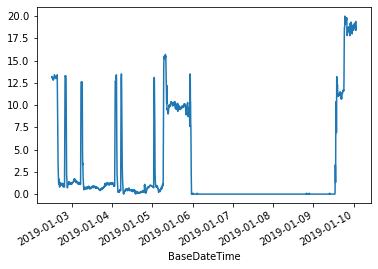

In [34]:
traj.to_point_gdf().SOG.plot()

In [12]:
smooth = mpd.KalmanSmootherCV(traj).smooth(process_noise_std=0.1, measurement_noise_std=10)
print(smooth)

Trajectory 212350000.0 (2019-01-02 12:00:00 to 2019-01-10 01:30:00) | Size: 2169 | Length: 9.8m
Bounds: (-121.88808407762832, 33.59564000173614, -118.17910007746636, 34.973653951415194)
LINESTRING (-121.88808407762832 34.43242002038925, -121.86755113435768 34.43226957943013, -121.84760


In [36]:
smooth.hvplot(c='SOG', line_width=7.0, width=700, height=400, colorbar=True,cmap="RdYlGn")

:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]   (SOG)

In [95]:
detector = mpd.TrajectoryStopDetector(traj_collection.trajectories[1])
stops = detector.get_stop_points(min_duration=timedelta(minutes=60), max_diameter=0.1)
stops['size'] = 100
stops.hvplot(geo=True,tiles='ESRI',s='size',c='duration_s',cmap="RdYlGn")

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (duration_s,size)

In [108]:
(mpd.StopSplitter(traj).split(max_diameter=0.1, min_duration=timedelta(hours=24))
 .hvplot(geo=True,tiles='ESRI',line_width=7.0, width=700, height=400, colorbar=True))

:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]
   .Path.II :Path   [Longitude,Latitude]

In [109]:
mpd.StopSplitter(traj).split(max_diameter=0.1, min_duration=timedelta(hours=24)).to_traj_gdf()

,traj_id,start_t,end_t,geometry,length,direction
0,212350000.0_2019-01-02 12:00:00,2019-01-02 12:00:00,2019-01-05 22:25:00,"LINESTRING (-121.88812 34.43242, -121.86750 34...",5.907616,101.305208
1,212350000.0_2019-01-09 14:00:00,2019-01-09 14:00:00,2019-01-10 01:30:00,"LINESTRING (-118.19437 33.68103, -118.20332 33...",3.519467,292.602554
